In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_json('data.json')

In [3]:
df

,normalized_mouth_area,width_over_height,label
0,0.227025,2.506402,open
1,0.409836,100.000000,open
2,0.375000,100.000000,open
3,0.392562,100.000000,open
4,0.196721,4.135215,open
...,...,...,...
432,0.167047,24.643711,closed
433,0.162700,12.134661,closed
434,0.145841,15.357283,closed
435,0.194443,51.119957,closed


C:\Users\felip\AppData\Local\Temp\ipykernel_22520\595721016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


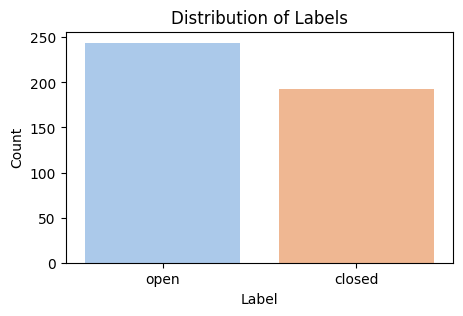

C:\Users\felip\AppData\Local\Temp\ipykernel_22520\595721016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='normalized_mouth_area', palette='pastel')


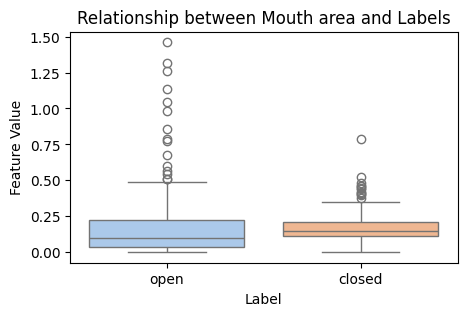

C:\Users\felip\AppData\Local\Temp\ipykernel_22520\595721016.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')


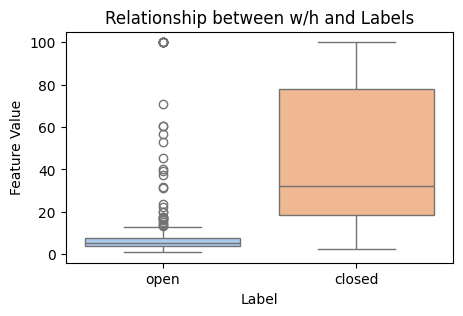

In [4]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='normalized_mouth_area', palette='pastel')
plt.title('Relationship between Mouth area and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')
plt.title('Relationship between w/h and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

In [5]:
X = df[['normalized_mouth_area', 'width_over_height']].values
y = df['label'].values

In [6]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', probability=True))
])

classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(probability=True))])

In [7]:
y_train_pred = cross_val_predict(classifier, X, y, cv=10)
y_train_pred

array(['open', 'closed', 'closed', 'closed', 'open', 'open', 'open',
       'closed', 'open', 'closed', 'open', 'open', 'closed', 'open',
       'open', 'closed', 'open', 'closed', 'open', 'closed', 'open',
       'open', 'closed', 'open', 'closed', 'open', 'open', 'open', 'open',
       'open', 'closed', 'open', 'open', 'open', 'open', 'closed', 'open',
       'closed', 'closed', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'closed', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'closed', 'closed', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'closed', 'open', 'open', 'open', 'open', 'closed', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open', 'open',
       'open', 'open', 'open', 'open', 'open', 'open', 'open'

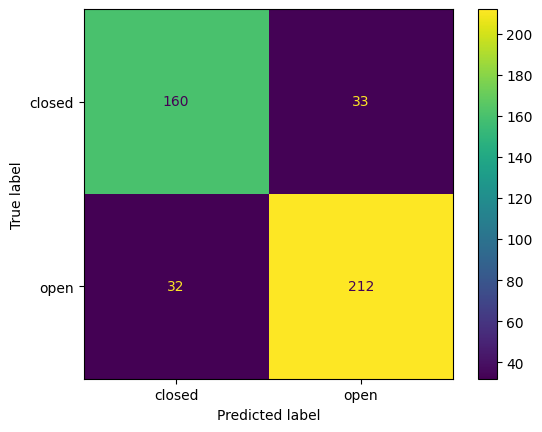

In [8]:
mat = confusion_matrix(y, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=classifier.classes_).plot()

In [9]:
precision = precision_score(y, y_train_pred, average='weighted')
recall = recall_score(y, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.8511854169585454
0.851258581235698
0.8512219975249667


In [10]:
import pickle

pickle.dump(classifier, open('mouthcloseness_model.pkl','wb'))